#Question1
Used variables : 
N :max number of iterations
S :training set
W :weights
size(X): size of element X
len(X): length of element X

#Question 1.a

O(len(S)^2) : (for x in S for y in S )
if there's no solution the algorithm will iterate N times (max number of iterations)

#Question 1.b

O(size(S)) 


In [14]:
#Packages 
from numpy.random import multivariate_normal
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

#Question2

#Question 2.1

In [ ]:
def generate_dataset(sigma1, sigma2, test_size=0.2):
  mu1 = [-1, 0]
  mu2 = [1, 0]
  
  cov1 = [ [sigma1 , 0 ], 
           [0 , sigma1 ] 
          ]

  cov2 = [  [ sigma2 , 0 ], 
            [ 0 , sigma2 ] 
          ]
  
  x1 = multivariate_normal(mu1, cov1, 125)
  x2 = multivariate_normal(mu2, cov2, 125)
  dataset = pd.DataFrame({
      "x": x1.tolist() + x2.tolist(),
      "y": [-1 for _ in range(125)] + [1 for _ in range(125)]
  })
  data = (x1, x2)
  x1, x2, y1, y2 = train_test_split(dataset.get("x"), dataset.get("y"), test_size=test_size, random_state=42)

  return x1, x2, y1, y2, data

x1, x2, y1, y2, data = generate_dataset(sigma1=0.1, sigma2=0.01)

#Question 2.2 Experiments

In [ ]:
# Perceptron algorithm
def perceptron(x, y, max_iterations=3000):
  w = np.zeros((1,2))
  p = np.zeros((1,2))
  for it in range(max_iterations):
        for X, Y in zip(x, y) :
            if  Y * np.inner(X, w) <= 0 : 
                p = w
                w = w + np.multiply(X, Y)
        if (w == p).all() :
            return (w, True)
  return (w, it>=max_iterations)

#Experiment 1

In [ ]:
# Generating Datasets
sigma_1 = 0.25
sigma_2 = 0.25
dataset_x, test_x, dataset_y, test_y, data = generate_dataset(sigma_1, sigma_2)

In [ ]:
w, Convergence = perceptron(dataset_x, dataset_y)
if Convergence:
  print("Perceptron algorithm converges")
else:
  print("Perceptron algorithm does not converge")

1)Does the algorithm converges? Why?

Yes the algorithm converges, 
the variance is small enough for the points in each group to be close to each other 
wich makes them inearly separable

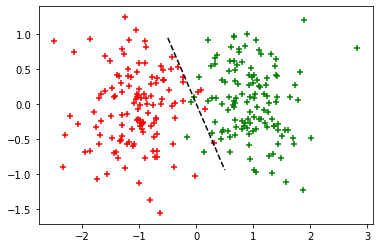

In [19]:
neg_data, pos_data = data
plt.scatter(neg_data[:,0],neg_data[:,1], marker='+', c='red')
plt.scatter(pos_data[:,0],pos_data[:,1], marker='+', c='green')

a = -w[0][0] / w[0][1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k--')

2)Is this decision boundary unique?

No, there are an infinity of possible boudries. It depends on weights initialization and generated data values.

3)Does changing the initialisation changes the result of the algorithm?

Yes changing the initialisation may affects the result of the algorithm.

In [20]:
y_predicted = []
for i, x in enumerate(test_x):
    pred = np.inner(x, w)
    if pred > 0 :
        y_predicted.append(1)
    else :
        y_predicted.append(-1)
accuracy = accuracy_score(test_y,y_predicted)
print("The accuracy is", accuracy)

The accuracy is 0.94


#Experiment 2

In [21]:
# Generate Datasets
sigma_1 = 0.75
sigma_2 = 0.75
dataset_x, test_x, dataset_y, test_y, data = generate_dataset(sigma_1, sigma_2)

In [22]:
w, Convergence = perceptron(dataset_x, dataset_y)
if Convergence:
  print("Perceptron algorithm converges")
else:
  print("Perceptron algorithm does not converge")

Perceptron algorithm does not converge


1)Does the algorithm converges? Why?

The algorithm does not converge,
0.75 is relatevely a high variance so the points in each group will be far from each other, 
that will create interferance in our data.

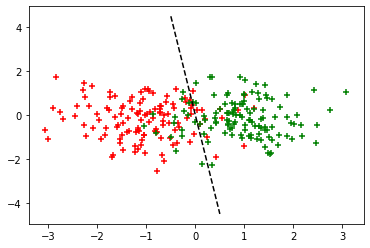

In [23]:
neg_data, pos_data = data
plt.scatter(neg_data[:,0],neg_data[:,1], marker='+', c='red')
plt.scatter(pos_data[:,0],pos_data[:,1], marker='+', c='green')

a = -w[0][0] / w[0][1]
xx = np.linspace(-0.5, 0.5)
yy = a * xx / w[0][1]

plt.plot(xx, yy, 'k--')

2)Is this decision boundary unique?

No, there are an infinity of possible boudries. It depends on weights initialization and generated data values.

3)Does changing the initialisation changes the result of the algorithm?

Yes changing the initialisation may affects the result of the algorithm.

In [24]:
y_predicted = []
for i, x in enumerate(test_x):
    pred = np.inner(x, w)
    if pred > 0 :
        y_predicted.append(1)
    else :
        y_predicted.append(-1)
accuracy = accuracy_score(test_y,y_predicted)
print("The accuracy is", accuracy)

The accuracy is 0.9


#Experiment 3

In [ ]:
sigmas = [0.01,0.1,0.5,0.7]
mean_error = []
variance_error = []
for sigma in sigmas :
    print(f"i: {sigmas.index(sigma)}")
    accuracies = []
    for i in range(30) :
        print("-", end="")
        dataset_x, test_x, dataset_y, test_y, data = generate_dataset(sigma, sigma)
        w, Convergence = perceptron(dataset_x, dataset_y)
        y_predicted = []
        for j, x in enumerate(test_x):
            pred = np.inner(x, w)
            if pred > 0 :
                y_predicted.append(1)
            else :
                y_predicted.append(-1)
        accuracy = accuracy_score(test_y,y_predicted)
        accuracies.append(accuracy)
    print("-\\")

    mean_error.append(1-np.mean(accuracies))
    variance_error.append(np.std(accuracies))

i: 0
-------------------------------\
i: 1
-------------------------------\
i: 2
-------------------------------\
i: 3
-------

In [ ]:
plt.errorbar(x=sigmas,y=mean_error,yerr=variance_error)

Note:

the increase of the variance is proportional to the increase of the error.

and it leads to the data becoming linearly unseperable.

The higher the variance, the bigger the range of the data generated, the bigger the more likely errors are to occur.